In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

# **Exploratory Data Analysis**

In [2]:
# Load data from google drive and show first five rows
path = os.getcwd()
data = pd.read_csv(path + '/admissions_data.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# Data has 500 rows and 9 columns

data.shape

(500, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
# Function for showing null or nan value and type value of each column
def summary(data):
  ''' Input: 
        A dataframe are loaded
      Output:
        A dataframe has three columns with percentage of missing data,
        number of unique value and type of values.'''
  missing_values = data.isnull().sum()

  percent_missing = missing_values / data.shape[0] * 100
  percent_missing = percent_missing.round(2) 

  summary = pd.concat([percent_missing, data.nunique(), data.dtypes], keys=['PercentageMissing', 'Nunique values', 'Dtype'], axis = 1)

  return summary

In [7]:
summary(data)

,PercentageMissing,Nunique values,Dtype
Serial No.,0.0,500,int64
GRE Score,0.0,49,int64
TOEFL Score,0.0,29,int64
University Rating,0.0,5,int64
SOP,0.0,9,float64
LOR,0.0,9,float64
CGPA,0.0,184,float64
Research,0.0,2,int64
Chance of Admit,0.0,61,float64


In [8]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

# **Visualization**

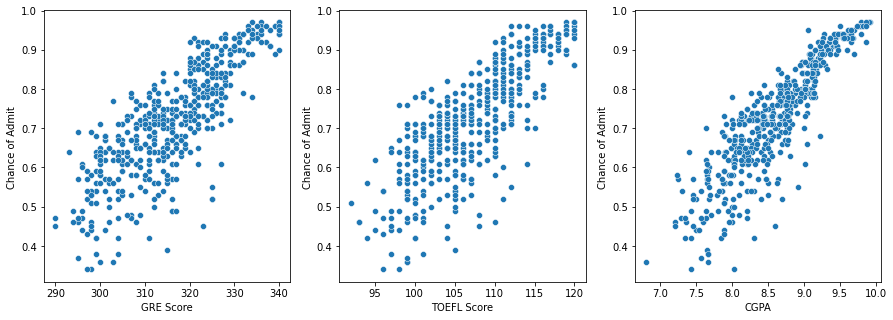

In [9]:
from matplotlib.gridspec import GridSpec
plt.figure(figsize=(15, 5)) # Set figsize
# Your code here
gses = GridSpec(1, 3)

continuous_columns_name = ['GRE Score', 'TOEFL Score', 'CGPA']

for i, gs in enumerate(gses):
  ax = plt.subplot(gs)
  sns.scatterplot(x = data[continuous_columns_name[i]], y = data['Chance of Admit '])

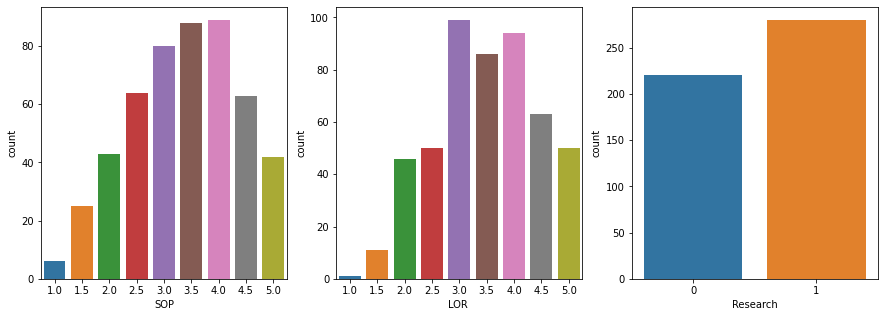

In [10]:
plt.figure(figsize=(15, 5))
gses = GridSpec(1, 3)

discrete_columns_name = ['SOP', 'LOR ', 'Research']

for i, gs in enumerate(gses):
  ax = plt.subplot(gs)
  sns.countplot(x = data[discrete_columns_name[i]])

# **Data Processing**

In [11]:
X = data.iloc[:, 1:8]
y = data.iloc[:, -1]
y.shape

(500,)

In [12]:
# X = pd.get_dummies(data=X, columns=discrete_columns_name)
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


# **Training Model**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

lr = LinearRegression()
lr.fit(X_train, y_train)

lr.score(X_train, y_train)

0.8223444375427976

# Evaluation

In [14]:
from sklearn.metrics import r2_score
pred = lr.predict(X_test)
r2_score(y_test, pred)

0.8163213016062121

# **TensorFlow**

In [19]:
from sklearn.preprocessing import StandardScaler, Normalizer
# from sklearn.compose import ColumnTransformer

# ct = ColumnTransformer([("scale", StandardScaler(), continuous_columns_name)], remainder="passthrough")
# X_train_sl = ct.fit_transform(X_train)
# X_test_sl = ct.transform(X_test)

sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.transform(X_test)

In [20]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import random
random.seed(43)

model = keras.Sequential([
                          layers.Dense(16, activation='relu', input_shape = [X.shape[1]]),
                          layers.Dropout(0.1),
                          layers.Dense(8, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(1)
])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
optimizer = keras.optimizers.Adam(0.005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

history = model.fit(X_train_scale, y_train, epochs=120, batch_size=8, validation_split=0.25, verbose=0, callbacks=[es])

Epoch 00096: early stopping


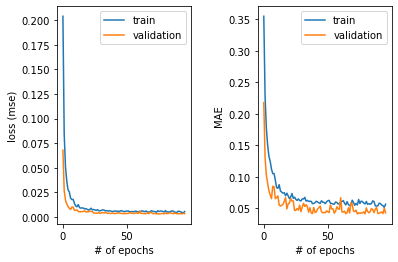

In [21]:
import matplotlib.pyplot as plt

def plot(history):
  #plotting
  fig, axs = plt.subplots(1, 2, gridspec_kw={'hspace': 1, 'wspace': 0.5}) 
  (ax1, ax2) = axs
  ax1.plot(history.history['loss'], label='train')
  ax1.plot(history.history['val_loss'], label='validation')
  ax1.legend(loc="upper right")
  ax1.set_xlabel("# of epochs")
  ax1.set_ylabel("loss (mse)")

  ax2.plot(history.history['mae'], label='train')
  ax2.plot(history.history['val_mae'], label='validation')
  ax2.legend(loc="upper right")
  ax2.set_xlabel("# of epochs")
  ax2.set_ylabel("MAE")

plot(history)

In [22]:
y_pred = model.predict(X_test_scale)
r2_score(y_pred, y_test)

0.6246693765252338